In [3]:
#IMPORTS HERE

import numpy as np
import gudhi
import ot 
import h5py #This should be run in a colab setting 
import gudhi.wasserstein

2023-09-30 16:36:10.241883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 16:36:14.803142: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-30 16:36:15.386066: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-30 16:36:15.386121: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [48]:
def load_hdf5_data(filename):
    dataset = None
    labels = None
    with h5py.File(filename,'r') as h5f: 
        dataset = h5f['data'][:]
        labels = h5f['label'][:]
    dataset = dataset - np.expand_dims(np.mean(dataset, axis=0), 0)  # center
    return dataset, labels

In [49]:
def compute_bottleneck(dgm1, dgm2):
    ''' Computes the bottleneck distance between two persistence diagrams

    Parameters:
        dgm1, dgm2: (N, 2) numpy array representing persistence points

    Returns:
        bottleneck distance 

    '''
    return gudhi.bottleneck_distance(dgm1,dgm2)
    

In [50]:
def compute_wasserstein(dgm1, dgm2):
    ''' Computes the Wasserstein distance between two persistence diagrams

    Parameters:
        dgm1, dgm2: (N, 2) numpy array representing persistence points

    Returns:
        Wasserstein distance 

    '''
    return gudhi.wasserstein.wasserstein_distance(dgm1,dgm2)

In [51]:
# TODO: try computing bottleneck and Wasserstein distance between a couple of persistence diagrams. 

In [52]:
def load_pcd(filename, show=False):
    ''' Loads 2D/3D point cloud data from *.npy files

    Parameters:
        filename: name of *.npy file.
        show: option to visualize point clouds in 3D

    Returns: 
        np.array formatted as [point_1, point_2, ..., point_n]
    
    '''
    array = np.load(filename)
    dim = array.shape[1]
    if show:
        fig = plt.figure()
        if dim == 3:
            ax = fig.add_subplot(projection='3d')
            ax.set_xlim3d(-1, 1)
            ax.set_ylim3d(-1, 1)
            ax.set_zlim3d(-1, 1)
            ax.scatter(array[:, 0],array[:, 1], array[:, 2])
        else:
            ax = fig.add_subplot()
            ax.scatter(array[:, 0], array[:, 1])
    return array

In [53]:
import time
def rips_gudhi(points, radius, max_dimension=2, show=False):
    ''' TODO: use Gudhi to create a Rips complex of some fixed radius parameter. 

    Parameters:
        points: original point cloud data
        radius: radius parameter
        max_dimension: maximum dimension of simplices in resulting complex
        show: option to visualize complex 

    Returns:
        Gudhi SimplexTree object

    '''
    cplex = gudhi.RipsComplex(points=points, max_edge_length=radius).create_simplex_tree(max_dimension=max_dimension)
    if show:
        fig = plt.figure()
        if points.shape[1] == 3:
            ax=fig.add_subplot(projection='3d')
        else:
            ax = fig.add_subplot()
        ax = complex_visualizer_PCD(points, cplex, ax)
    return cplex

In [54]:
def plot_persistence_diagram(ax, persistence_points, dimension=0):
    dgm = []
    for pt in persistence_points:
        if pt[0] == dimension:
            dgm.append(pt[1])
    dgm = np.array(dgm)
    ax.scatter(dgm[:, 0], dgm[:, 1])

In [55]:
pcd_1 = load_pcd('msri-day1/data/sam/msri-data/point-clouds/2D/annulus.npy')

In [56]:
pcd_2 = load_pcd('msri-day1/data/sam/msri-data/point-clouds/2D/two-circles.npy')

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

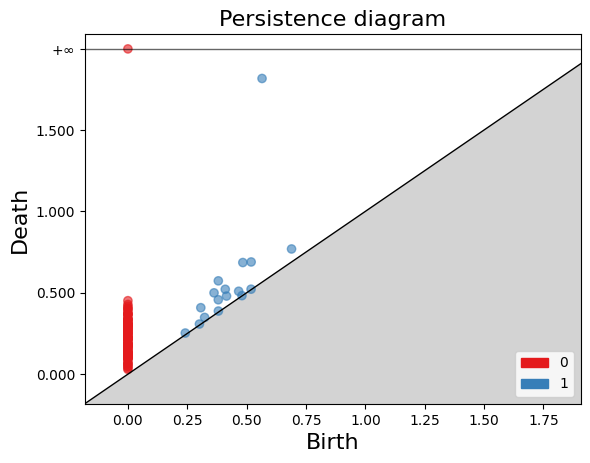

In [57]:
complex = rips_gudhi(pcd_1, radius=2.0, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

[(1, (0.818732365699521, 1.7416885206574815)), (1, (0.597914634525654, 0.8689466019606804)), (0, (0.0, inf)), (0, (0.0, 0.7396839492583291)), (0, (0.0, 0.6149823987188016)), (0, (0.0, 0.4421548868972967)), (0, (0.0, 0.37078837041594437)), (0, (0.0, 0.35531077295318697)), (0, (0.0, 0.35468666290660705)), (0, (0.0, 0.3370684292345557)), (0, (0.0, 0.31674080596853843)), (0, (0.0, 0.3081502420125538)), (0, (0.0, 0.29258357835201804)), (0, (0.0, 0.2797871216466618)), (0, (0.0, 0.2704497993825648)), (0, (0.0, 0.25636820130243954)), (0, (0.0, 0.22624729206725785)), (0, (0.0, 0.21797717904124841)), (0, (0.0, 0.19718180449615652)), (0, (0.0, 0.1952349884940974)), (0, (0.0, 0.18935023516309968)), (0, (0.0, 0.16608443492444475)), (0, (0.0, 0.1591300453522461)), (0, (0.0, 0.13455530007060265)), (0, (0.0, 0.12416439214247459)), (0, (0.0, 0.12257860900903418)), (0, (0.0, 0.09679326925486133)), (0, (0.0, 0.08806503399115372)), (0, (0.0, 0.08634455521897734)), (0, (0.0, 0.07616322178596197)), (0, (0.0

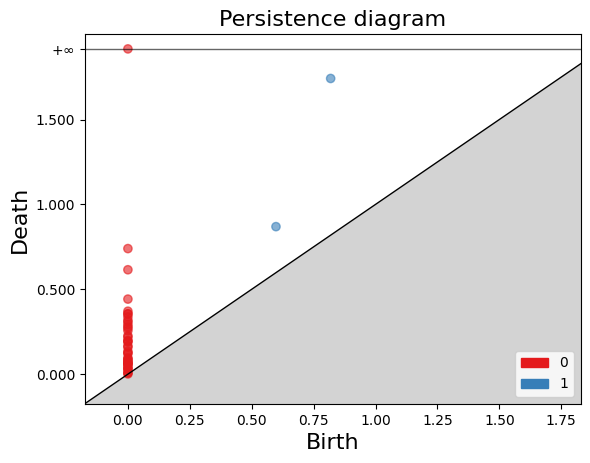

In [61]:
complex_2 = rips_gudhi(pcd_2, radius=2.0, max_dimension=2, show=False)
persistence_points_2 = complex_2.persistence()
gudhi.plot_persistence_diagram(persistence_points_2)

print((persistence_points_2)) 
##format this filetype to a numpy array, the first number indicates which homology group it belongs
##

In [59]:
compute_wasserstein(persistence_points_1,persistence_points_2)

TypeError: list indices must be integers or slices, not tuple